In [34]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

%load_ext autoreload
%autoreload 2
    
R = 5
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]


k=10
A = np.random.randn(k,k)
print(A)
#A = np.matrix([[-1.33078762,  1.11957084],
# [ 1.94899641, -0.44264903]])

def random_poly(theta, phi):
    x = np.cos(theta)
    y = np.cos(phi)
    sum_ = 0
    for i in range(k):
        for j in range(k):
            sum_ = sum_ + A[i,j]*math.pow(x,i)*math.pow(y,j)
    return sum_


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[-1.21728617e+00 -1.22378214e+00 -3.12988111e-01  4.35243178e-01
  -6.41266368e-01 -9.42304764e-01 -9.28756599e-01  6.16892223e-01
   1.34601042e+00 -8.68882642e-01]
 [ 2.61839489e+00  1.55596529e-01 -1.44238453e-01 -1.27470589e-02
   1.88629702e+00  5.69977474e-01 -4.33003028e-01  1.59005493e-03
   8.90491925e-02 -4.23584066e-01]
 [-1.14844684e+00  6.78219077e-03  1.85092876e+00 -1.10876407e+00
   3.58921958e-01  1.88738665e-01 -1.11429460e+00 -1.65198067e+00
  -8.65525455e-01 -1.14024207e+00]
 [-1.21902128e+00 -1.66973425e+00 -2.02280434e+00 -1.75072523e+00
  -1.01899821e+00  5.63877122e-01 -3.02214674e-01 -6.10365445e-01
   1.70433183e-01 -1.11044393e+00]
 [-1.44024870e+00  9.23922429e-01  5.44160977e-01  7.22438845e-01
   6.63001175e-01 -9.69099118e-02 -1.37490648e+00  2.08817445e+00
   5.70736056e-02  6.04849142e-02]
 [-7.70337028e-02 -1.79670604e+00  8.19581091e-02 -3.03868808e-01
  -3.285816

(42, 42)
(42, 42)
(42, 42)
(42, 42)


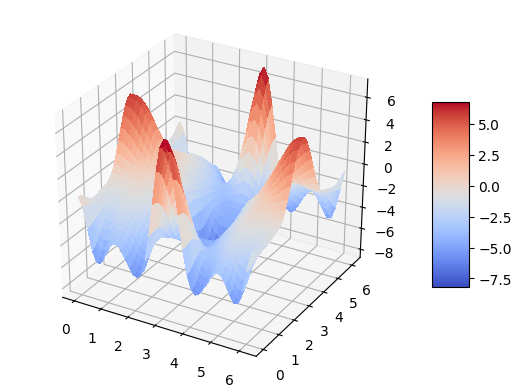

In [54]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 2*math.pi, 0.15)
Y = np.arange(0, 2*math.pi, 0.15)
X, Y = np.meshgrid(X, Y)
print(X.shape)
print(Y.shape)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print(Z.shape)

Z = np.zeros((X.shape[0], X.shape[1]))
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = random_poly(X[i,j], Y[i,j])
print(Z.shape)

# Plot the surface.

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [35]:
def torus_wind(theta, phi, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    ratio = 0.735
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = torus_point(theta+(time_i+i)*math.pi/(4*length), phi+ratio*(time_i+i)*math.pi/(4*length))
        traj[i][0] = (time_i+i)*math.pi/length
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

def poly_torus(theta, phi, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    ratio = 0.735
    traj = np.zeros((time_f-time_i,2))
    for i in range(0, time_f-time_i):
        traj[i][1] = random_poly(theta+(time_i+i)*math.pi/(4*length), phi+ratio*(time_i+i)*math.pi/(4*length))
        traj[i][0] = (time_i+i)*math.pi/length
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

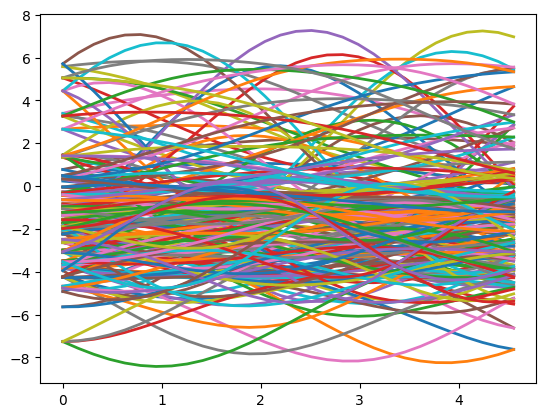

In [40]:
list_traj = []
N=15
length=20
project = True

for i in range(N):
    for j in range(N):
        #list_traj.append(torus_wind(2*i*math.pi/N, 2*j*math.pi/N, length, noise=0,time_i=0, time_f=int(1.5*length)))  
        list_traj.append(poly_torus(2*i*math.pi/N, 2*j*math.pi/N, length, noise=0,time_i=0, time_f=int(1.5*length)))  

#ax = plt.figure().add_subplot(projection='3d')
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Torus windings")
for i in range(len(list_traj)):
    plt.plot(list_traj[i][:,0],list_traj[i][:,1], lw=2)
plt.show()

In [43]:
traj_list = list_traj
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, 0.01*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      0.01*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(2, 9)

print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[-0.50606406, -0.01208695, -0.77824182,  0.09250119, -0.26805318, -1.80277067,
   0.65785078, -1.50108459,  1.40912873]]
A = [[ 0.26091896, -1.41097101,  0.83429924,  0.29977495,  1.58207845,  0.14060155,
   0.36938206, -0.35587076, -1.62595019],
 [-1.1529032, 0.54976141,  1.58742566,  1.51749454,  0.409861, 0.03610766,
  -0.82956347, 0.84117888, -0.72650092]]
project = True

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    #tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
    tlist_new[i] = 
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))
list_traj = traj_list


Trajectory shape before embedding:
(30, 4)
[[ 1.21749731  0.87787958 -0.34993652 -0.69602048 -0.41502814 -1.64058715
   0.53636512 -0.01414495  0.63746893]
 [-0.48467469 -0.25888685 -0.56368116  0.59848075  0.95767488 -0.21207597
   0.54164235 -1.83674193 -1.74469807]]
Trajectory shape after embedding and projecting:
(30, 3)


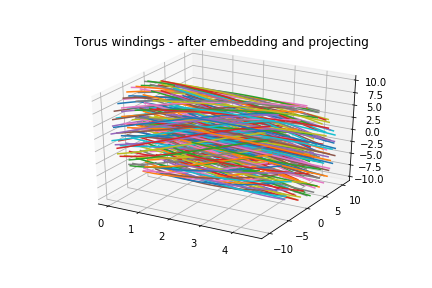

In [44]:
if project == True and traj_list[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()


In [41]:
t2s = Traj2Sim()
traj_list = list_traj
load=False
project=True
if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_hd.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_hdto1d.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_hdto1d.npy')

|█████████████████████████████████▉      | ▇▇▅ 21352/25200 [85%] in 17:56 (29/25200 [0%] in 1s (22.7/s,(23.2/s▇▇▅ 391/25200 [2%] in 17s (23.3/ (23.2/ 485/25200 [2%] in 21s (23.2/ ▆▄▂ 888/25200 [4%] in 38s (23.5/ 996/25200 [4%] in 42s (23.5/ 1038/25200 [4%] in 44s (23.51133/25200 [4%] in 48s (23.5▇▅▃ 1173/25200 [5%] in 50s (23.5(23.5 ▄▆█ 1197/25200 [5%] in 51s (23.5(23.41399/25200 [6%] in 1:00 (23. ▄▆█ 1483/25200 [6%] in 1:03 (23. (23. in 1:09 (23.(23. ▂▂▄ 1842/25200 [7%] in 1:18 (23. (23.▃▅▇ 1852/25200 [7%] in 1:19 (23. in 1:25 (23. 2060/25200 [8%] in 1:28 (23.(23.in 1:32 (23. ▅▇▇ 2226/25200 [9%] in 1:35 (23. 2234/25200 [9%] in 1:35 (23. ▄▆█ 2299/25200 [9%] in 1:38 (23. 2599/25200 [10%] in 1:50 (23 in 1:52 (23 (23 2941/25200 [12%] in 2:05 (23(23 3172/25200 [13%] in 2:15 (23 3204/25200 [13%] in 2:16 (23in 2:17 (23 ▅▃▁ 3261/25200 [13%] in 2:19 (23in 2:20 (23▅▃▁ 3293/25200 [13%] in 2:20 (23▃▁▃ 3371/25200 [13%] in 2:24 (23in 2:24 (23▁▃▅ 3529/25200 [14%] in 2:30 (23 (23▂▄▆ 3604/25200 [14%] 

|████████████████████████████████████████| 25200/25200 [100%] in 22:23.9 (1 21372/25200 [85%] in 17:57 ( 21373/25200 [85%] in 17:57 ( ▄▆█ 21418/25200 [85%] in 18:01 ( 21463/25200 [85%] in 18:04 ( 21465/25200 [85%] in 18:04 (in 18:04 ( in 18:05 (▆█▆ 21482/25200 [85%] in 18:05 ( ▇▅▃ 21487/25200 [85%] in 18:06 ( ▅▇▇ 21505/25200 [85%] in 18:07 (▂▂▄ 21518/25200 [85%] in 18:08 (▂▄▆ 21521/25200 [85%] in 18:08 (21553/25200 [86%] in 18:10 (in 18:14 (in 18:15 (▇▇▅ 21634/25200 [86%] in 18:17 ( 21636/25200 [86%] in 18:17 (▂▂▄ 21651/25200 [86%] in 18:18 ( 21668/25200 [86%] in 18:20 (21723/25200 [86%] in 18:24 (▁▃▅ 21756/25200 [86%] in 18:27 ( ▅▃▁ 21769/25200 [86%] in 18:29 ( (( in 18:34 (▆▄▂ 21886/25200 [87%] in 18:41 (▆▄▂ 21968/25200 [87%] in 18:48 ( ▅▃▁ 21970/25200 [87%] in 18:48 (((▄▂▂ 22088/25200 [88%] in 18:56 ( in 18:56 ( ▂▂▄ 22122/25200 [88%] in 18:58 ( ▆█▆ 22159/25200 [88%] in 19:01 ( ( ▇▇▅ 22211/25200 [88%] in 19:05 (22221/25200 [88%] in 19:05 (▄▆█ 22233/25200 [88%] in 19:06 ( in 19:06 (▃▅

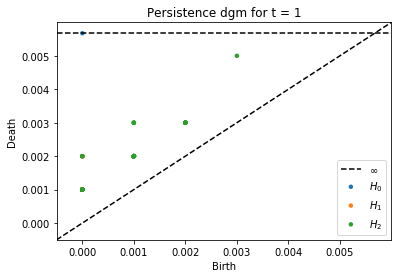

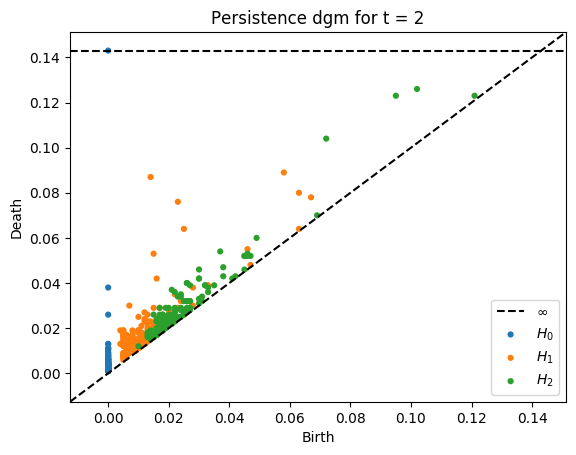

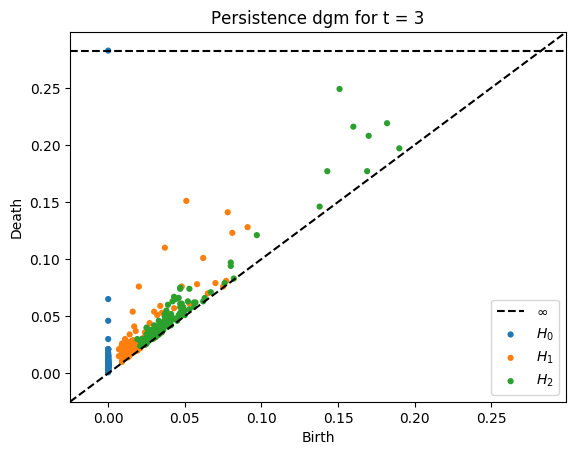

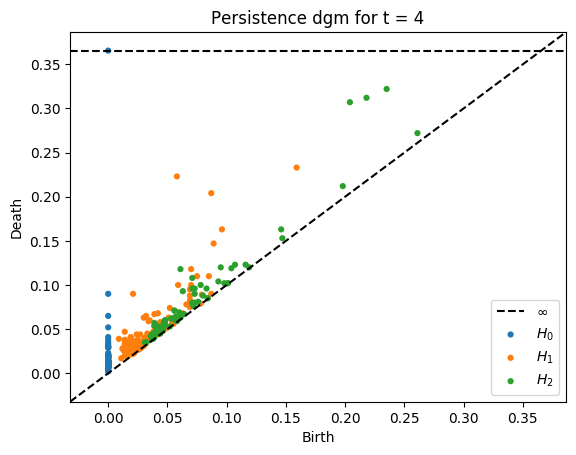

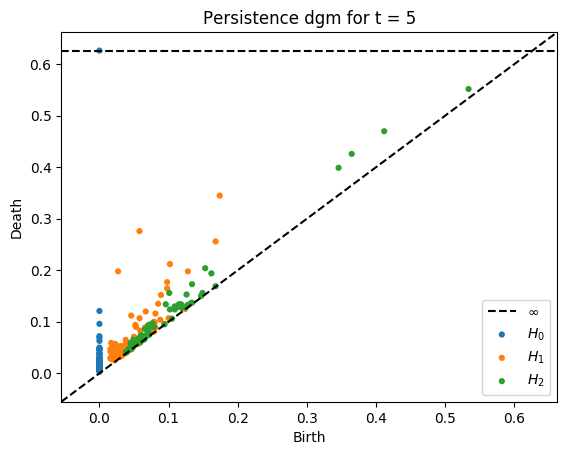

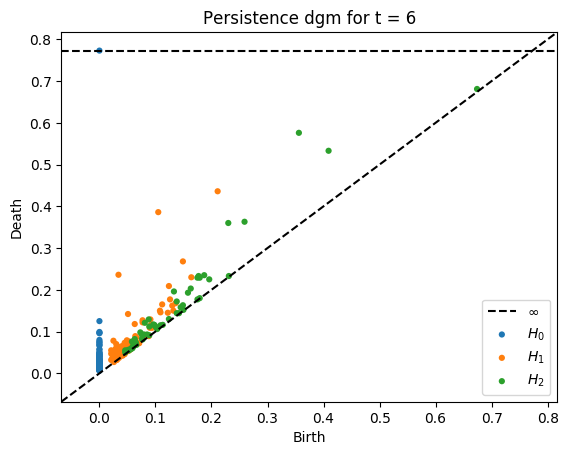

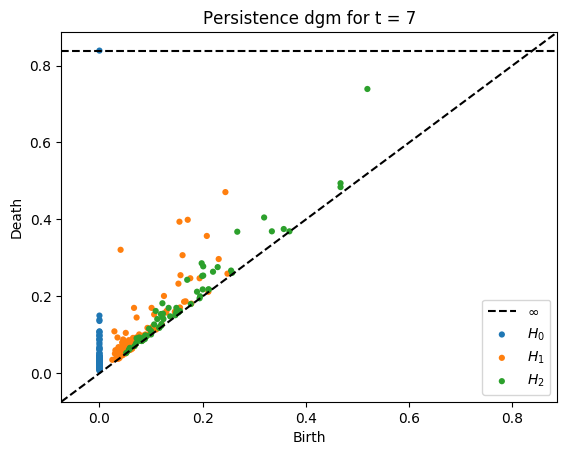

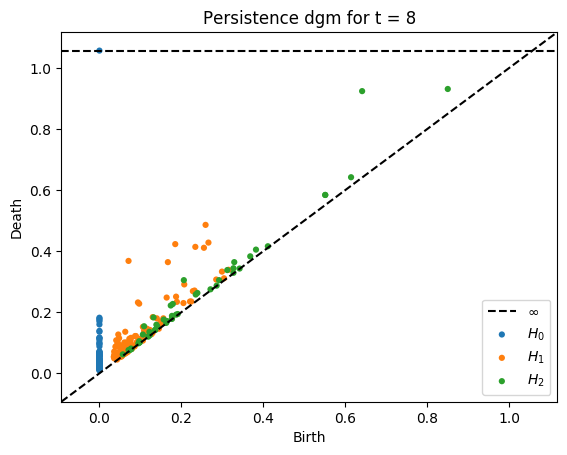

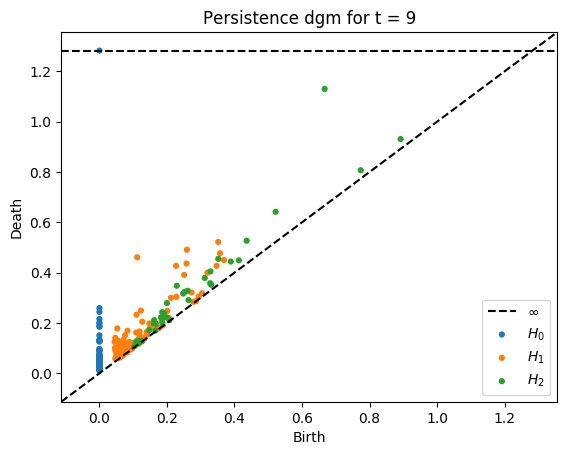

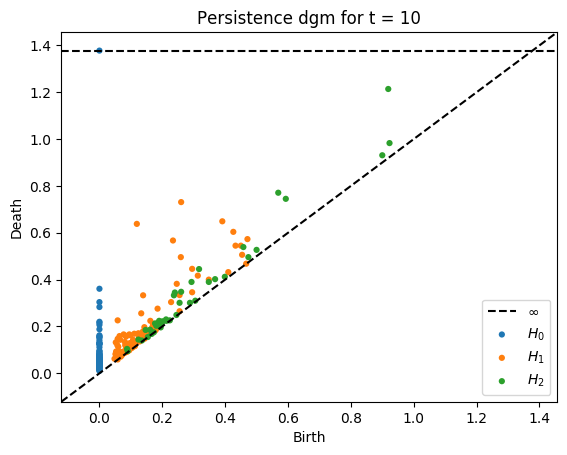

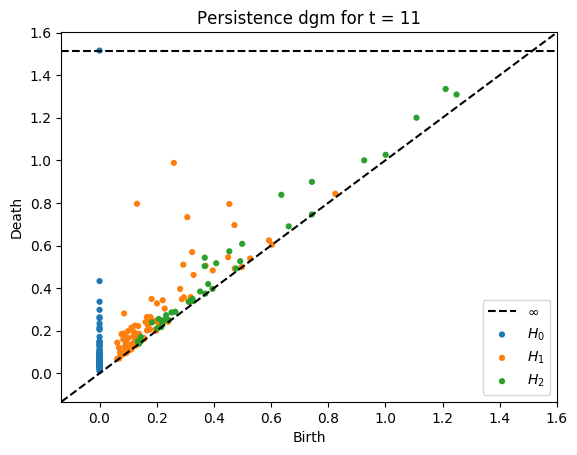

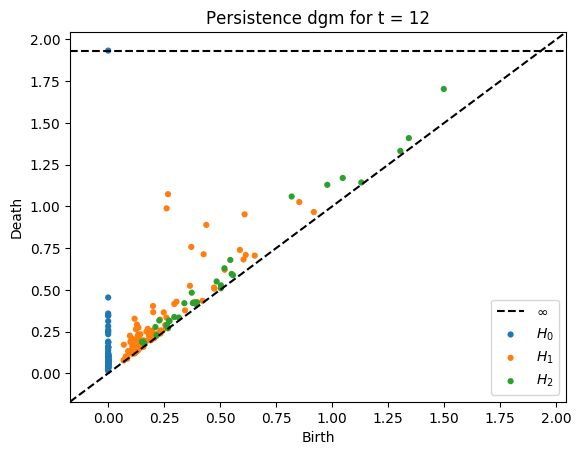

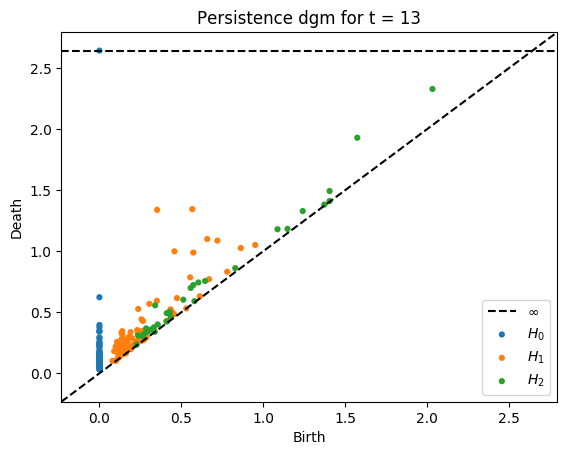

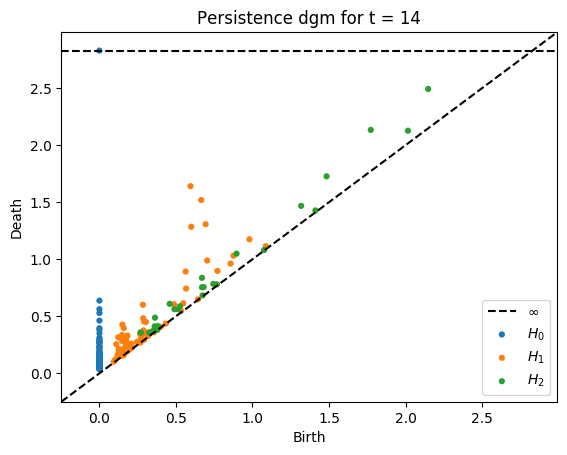

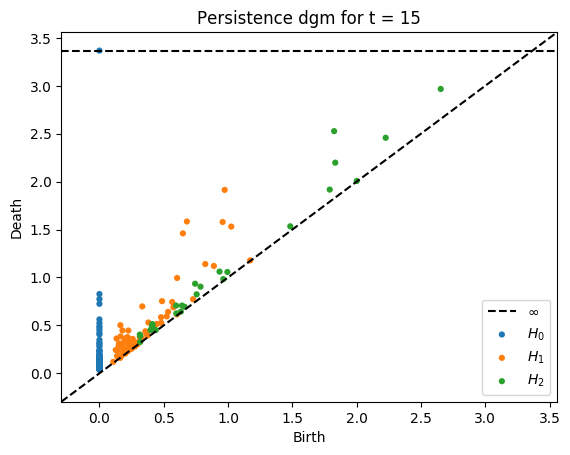

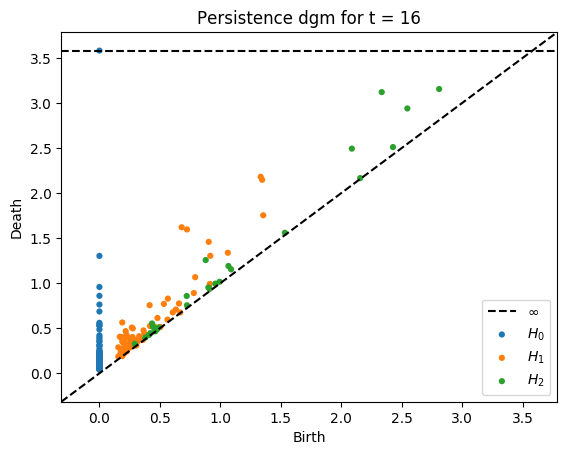

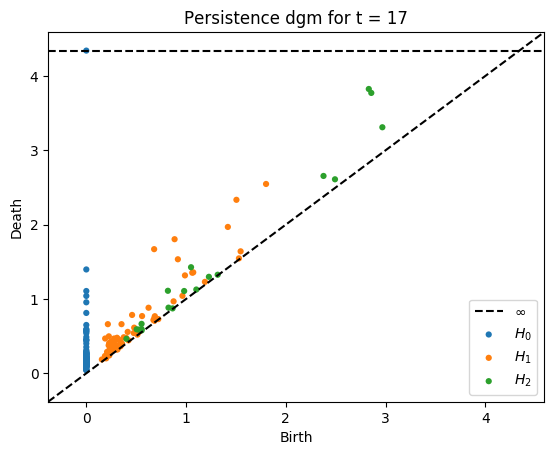

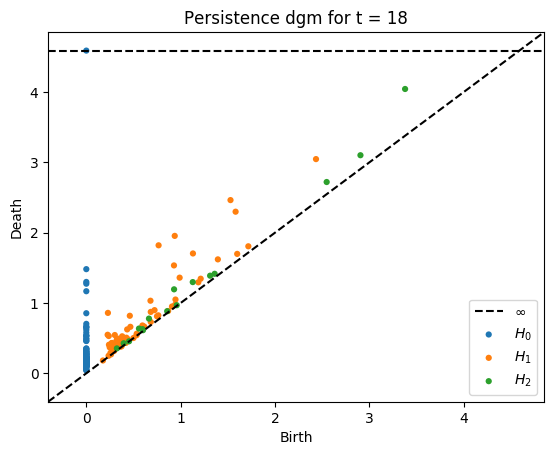

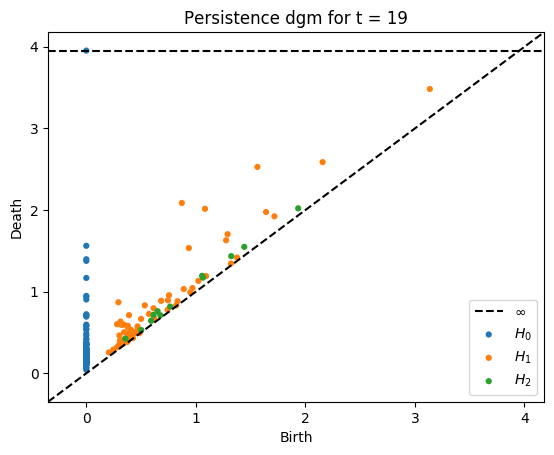

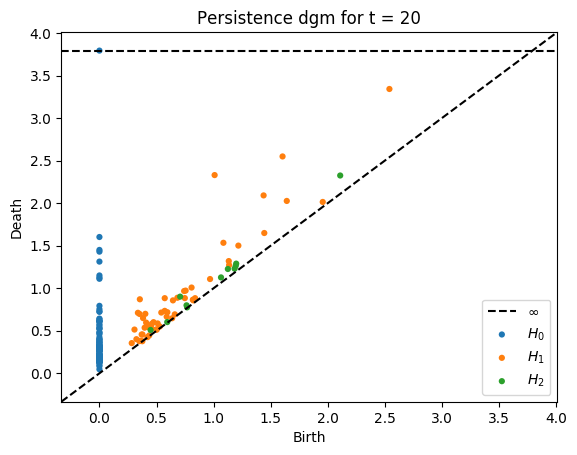

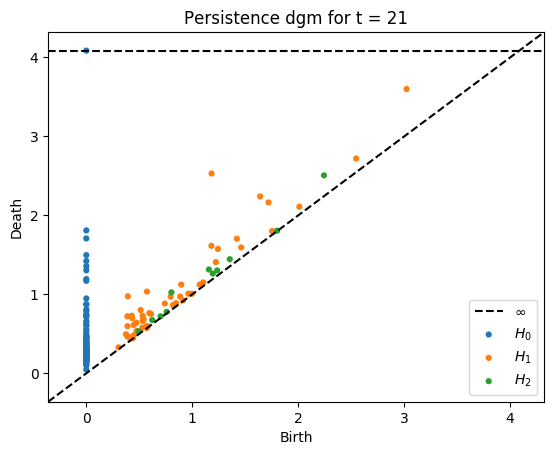

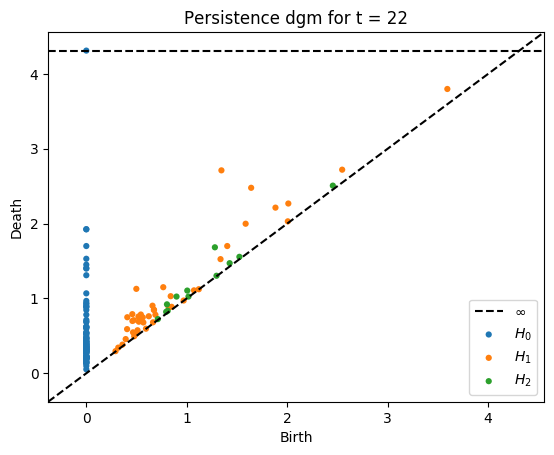

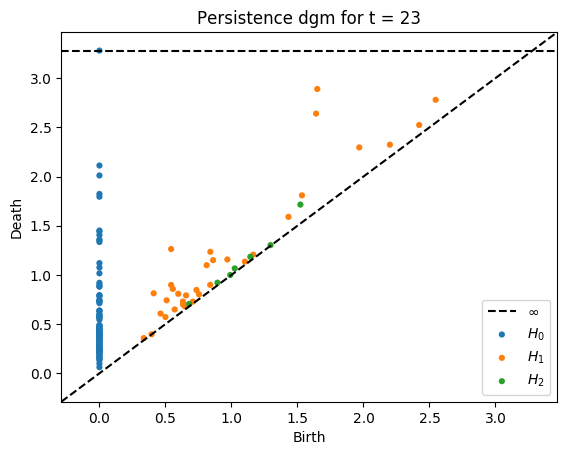

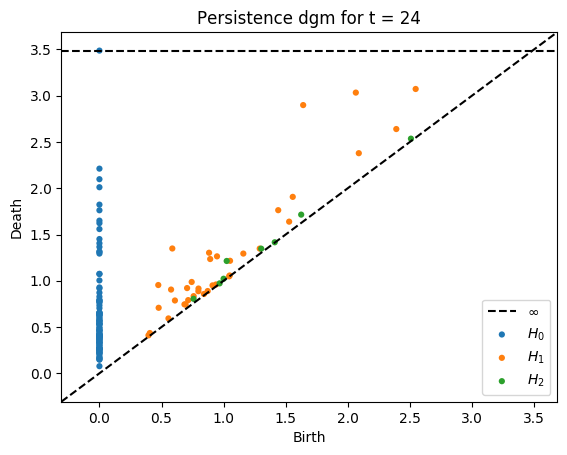

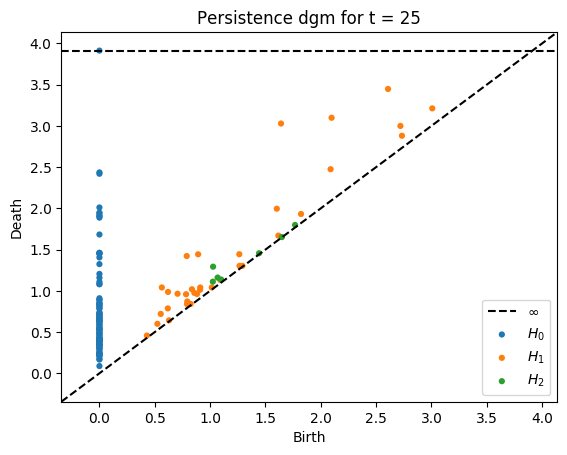

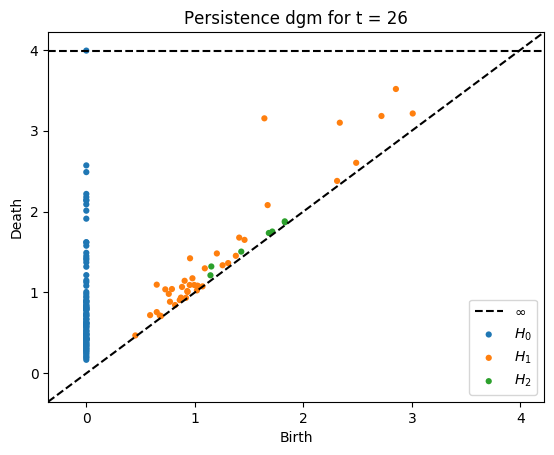

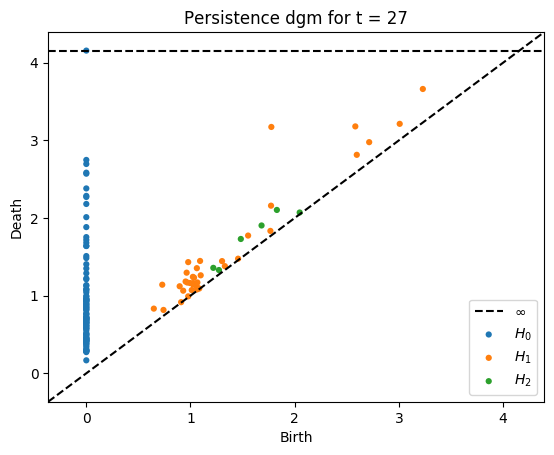

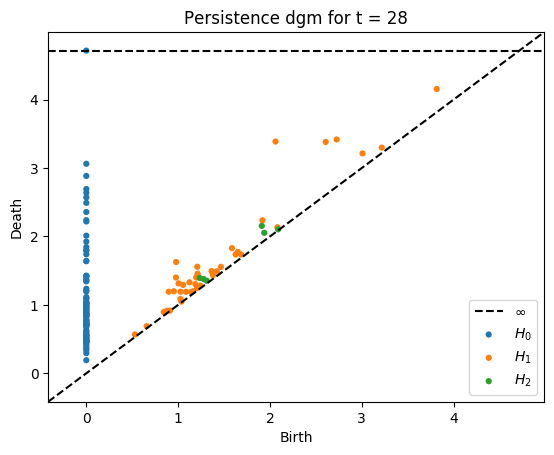

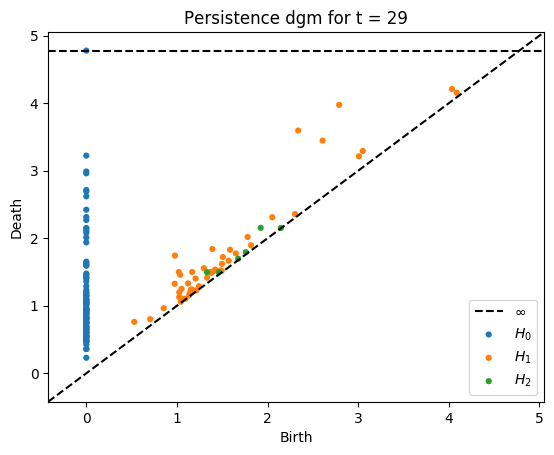

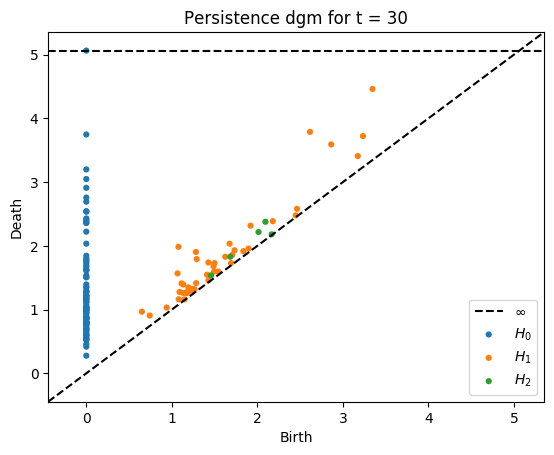

In [39]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

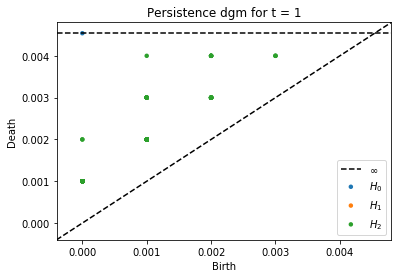

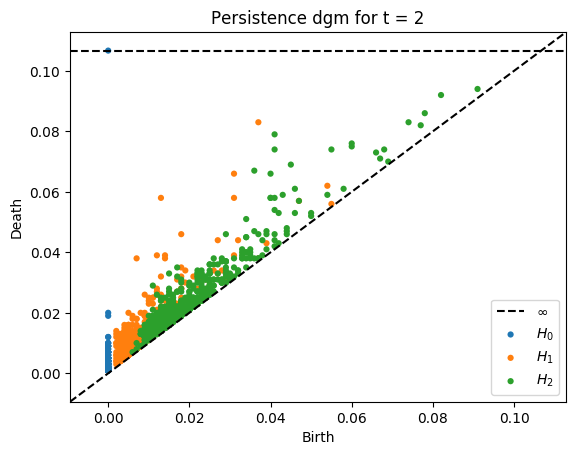

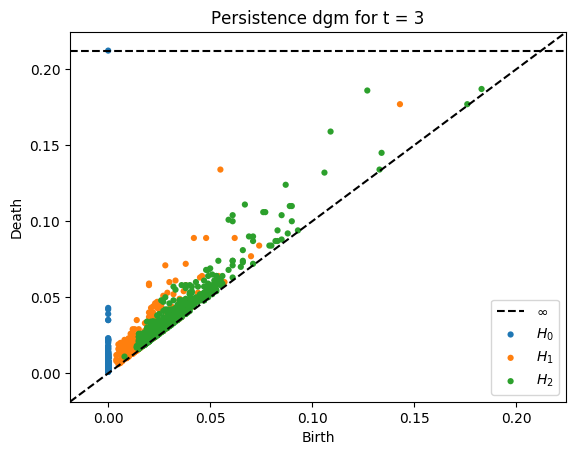

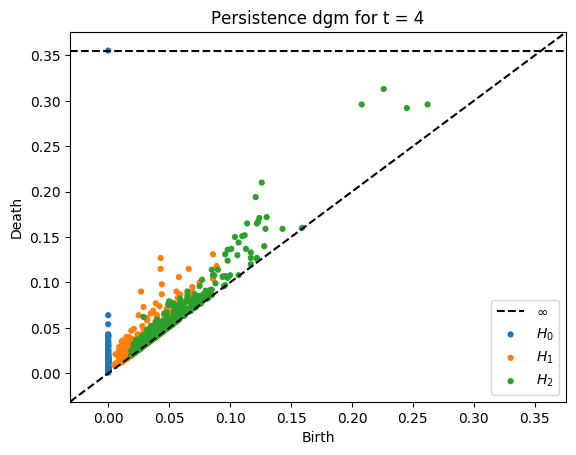

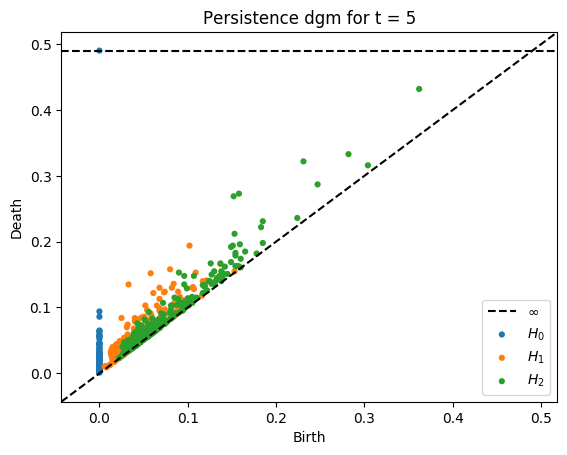

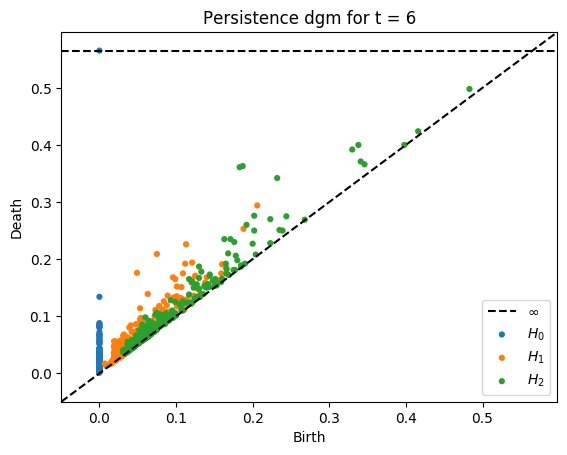

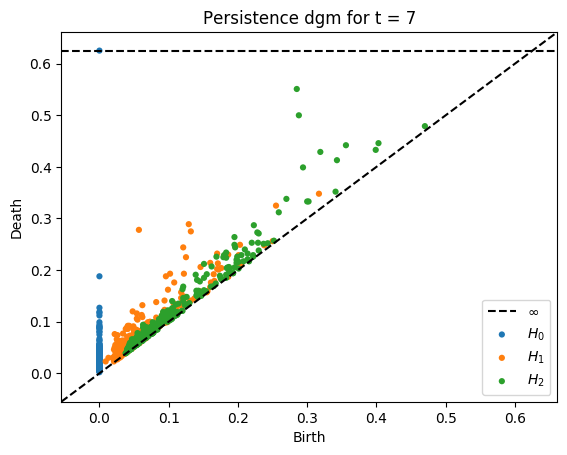

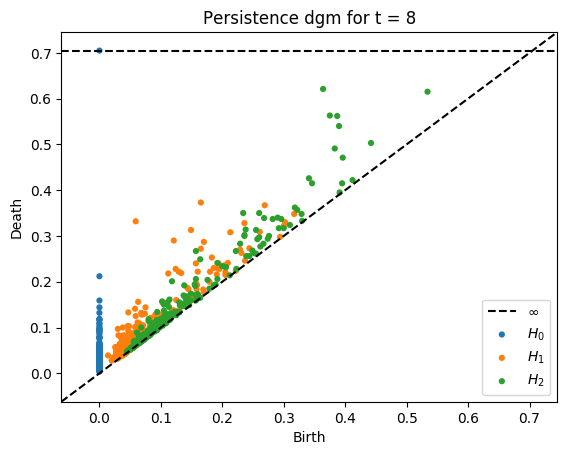

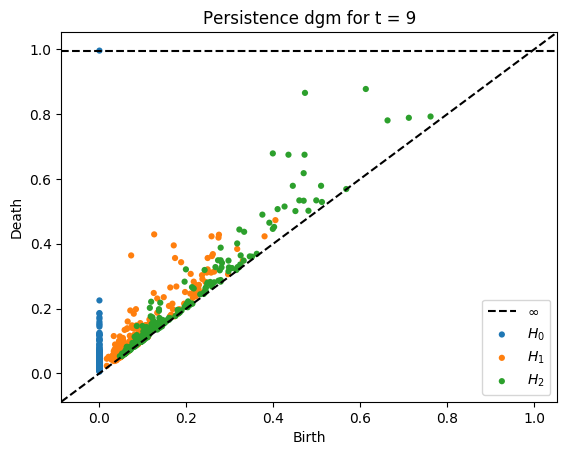

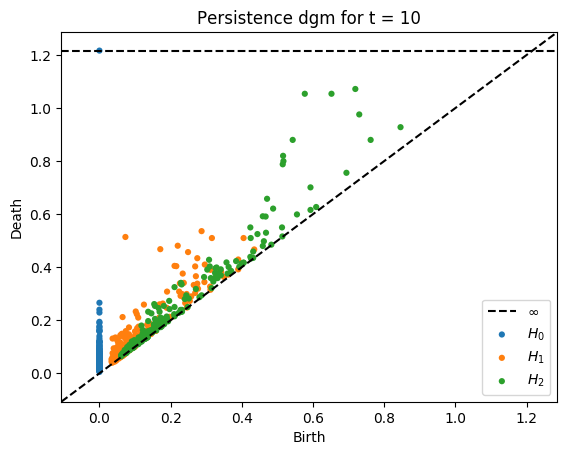

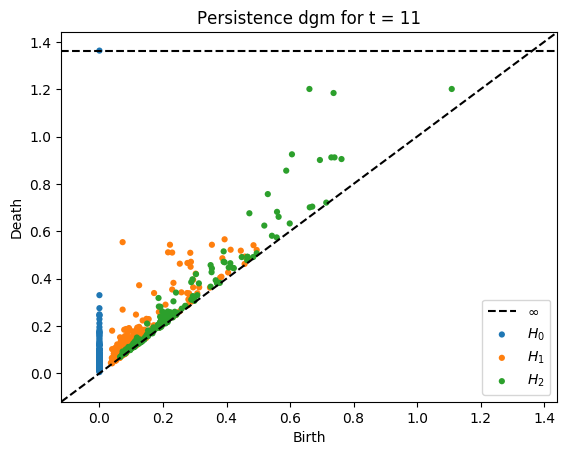

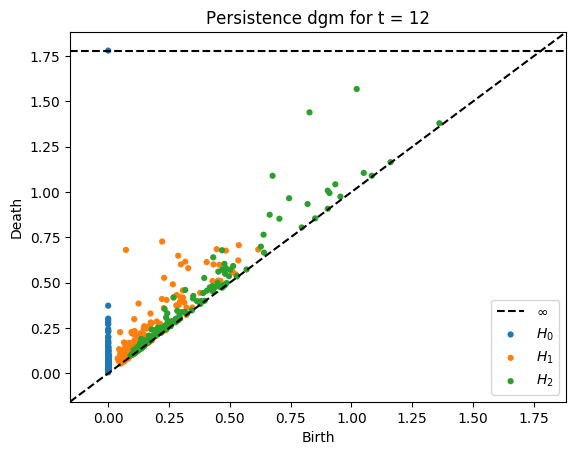

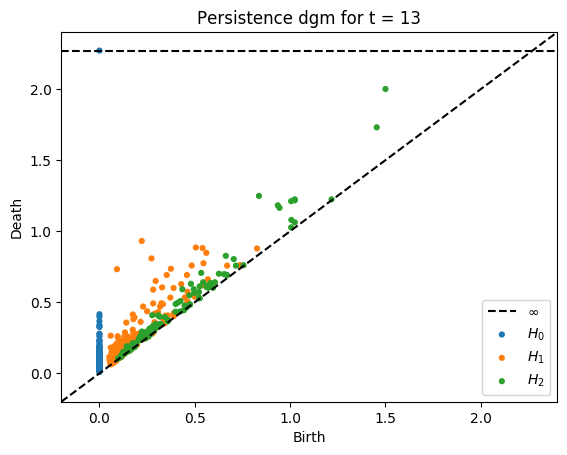

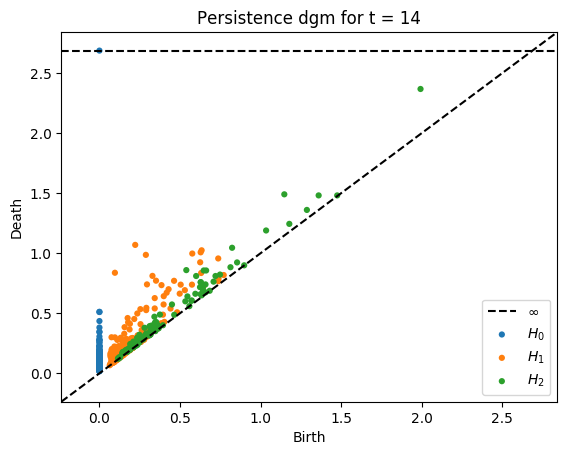

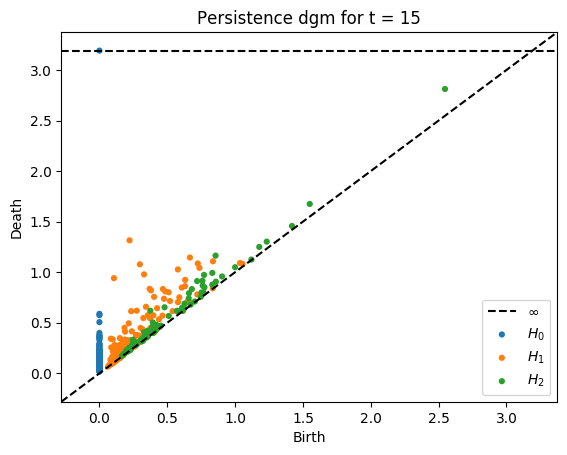

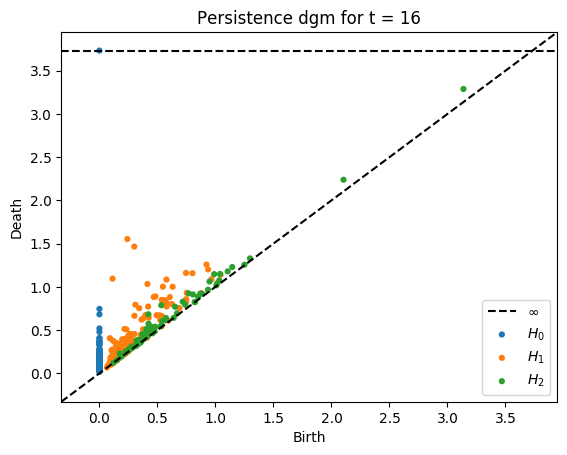

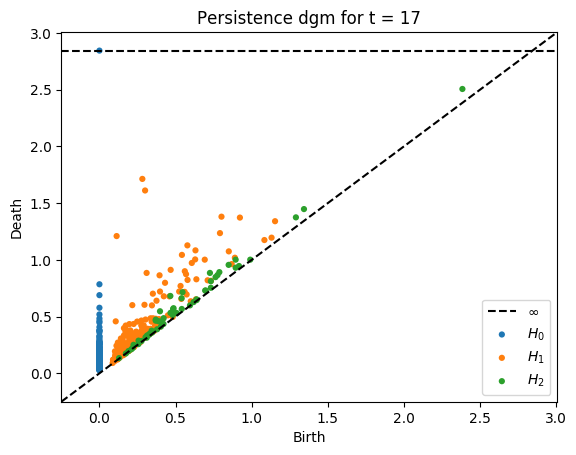

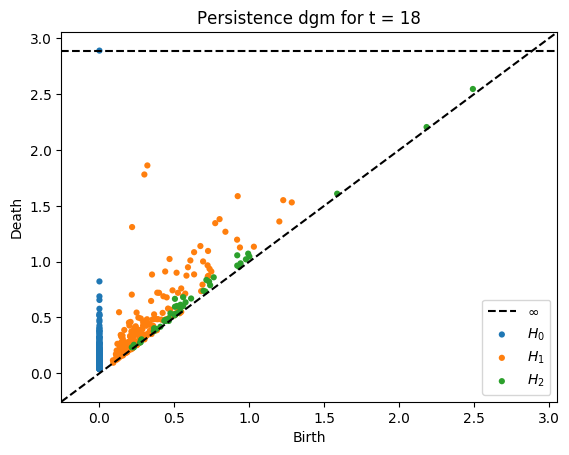

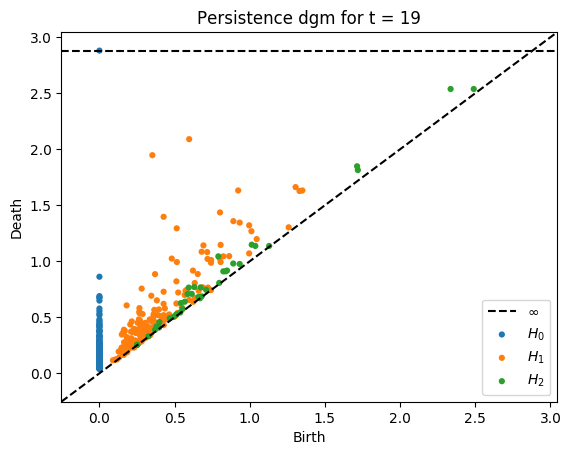

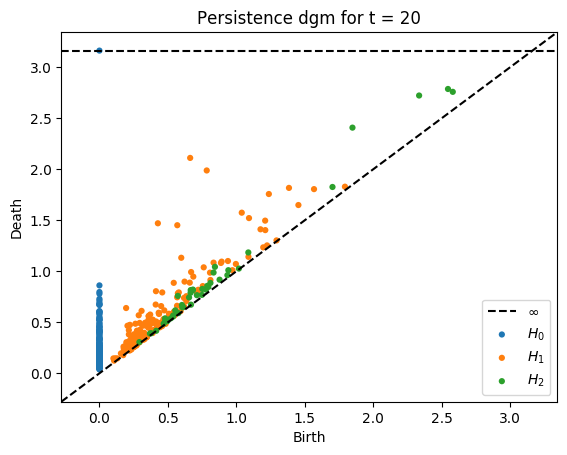

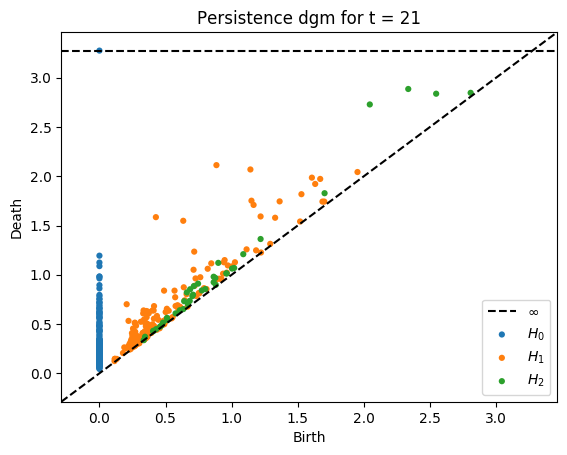

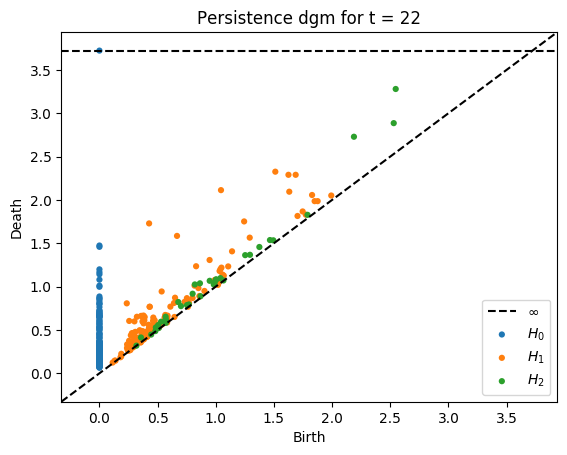

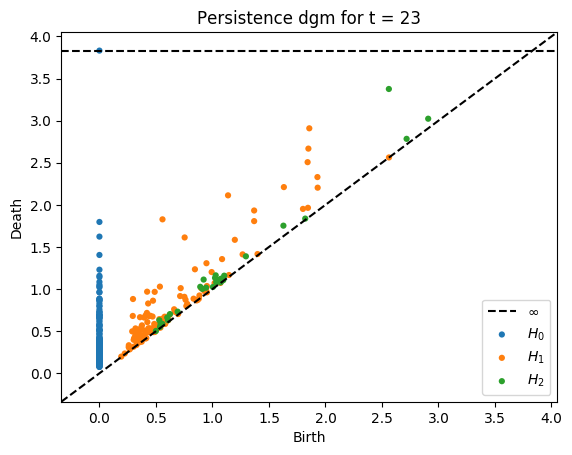

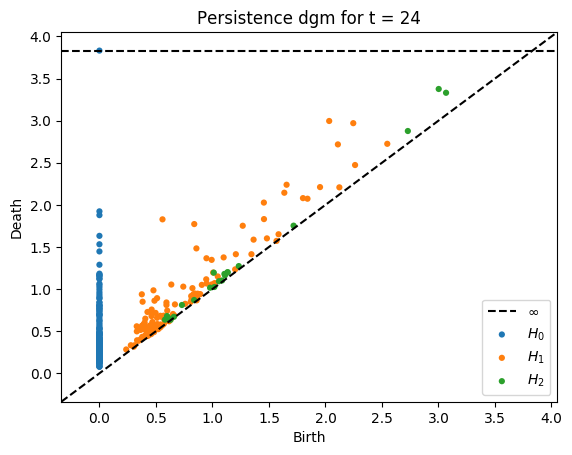

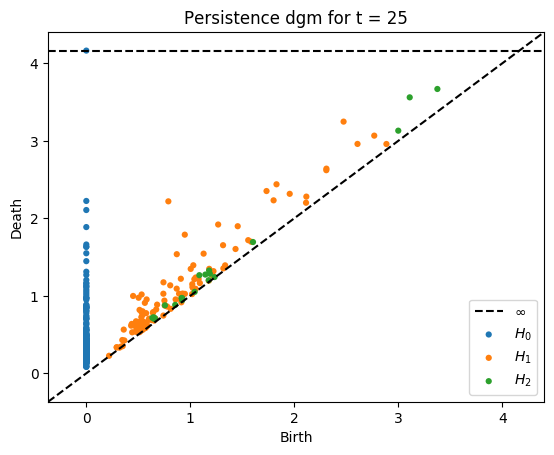

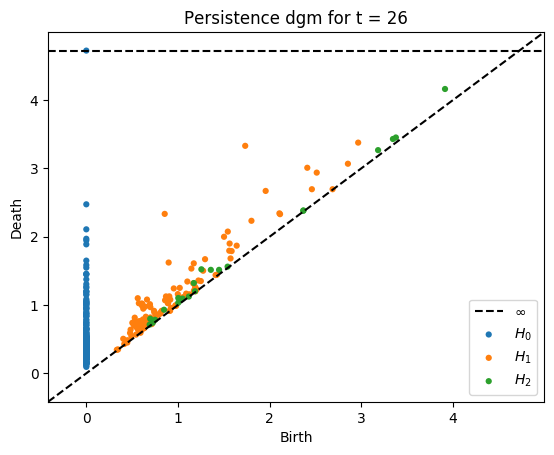

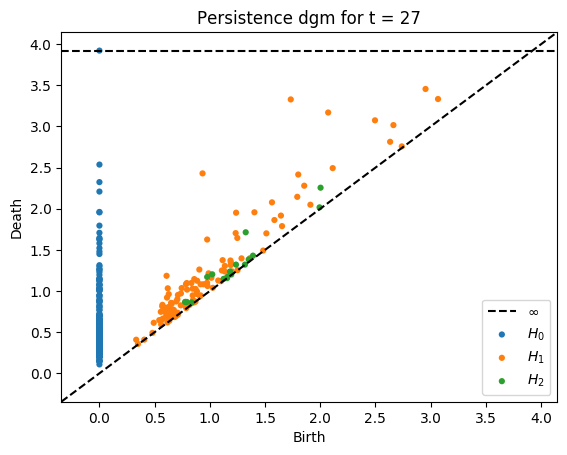

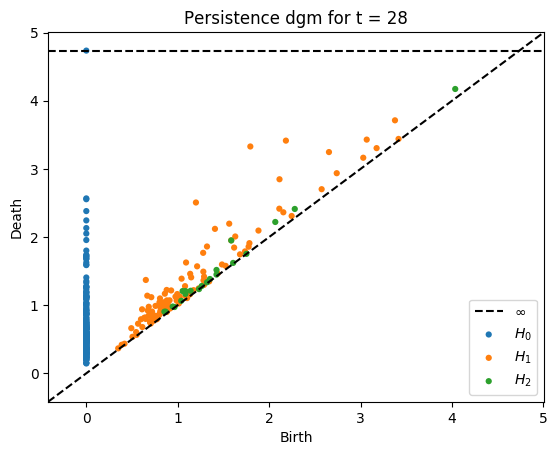

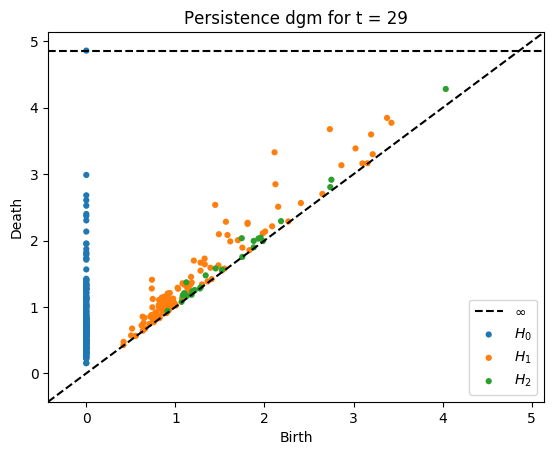

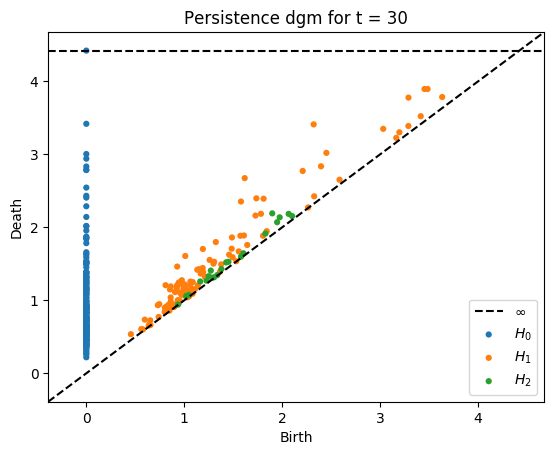

In [42]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)